<a href="https://colab.research.google.com/github/pvpogorelova/metrics_24_25/blob/main/Sem_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Семинар 29.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

In [ ]:
# Задание 1.
# Создаём ряд с нуля
np.random.seed(777)
n_obs = 100

# Создаем временной индекс
date = pd.date_range(start='2010-01-01', periods=n_obs, freq='M')

# Создаем процессы
ts = pd.DataFrame({
    'date': date,
    'wn': np.random.normal(loc=10, scale=2, size=n_obs),  # белый шум
    'rwalk': 10 + np.random.normal(loc=0, scale=1, size=n_obs).cumsum()  # случайное блуждание с дрейфом
}).set_index('date')

<ipython-input-3-c03e926e5563>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date = pd.date_range(start='2010-01-01', periods=n_obs, freq='M')


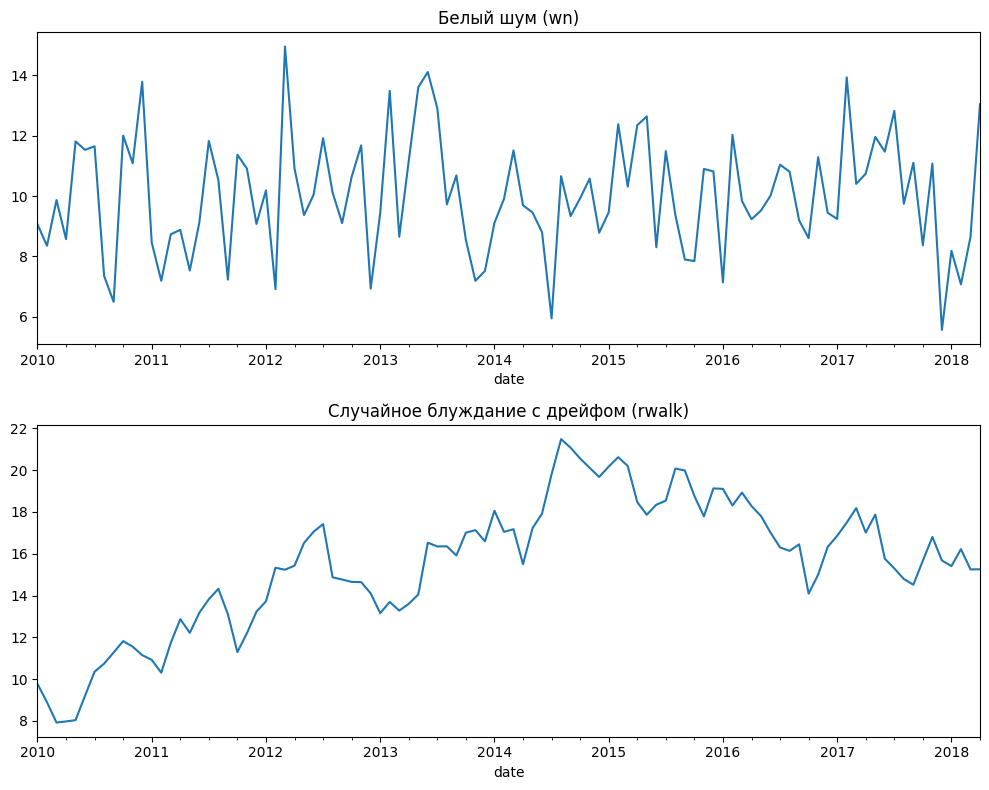

In [ ]:
# Построим графики
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ts['wn'].plot(ax=ax1, title='Белый шум (wn)')
ts['rwalk'].plot(ax=ax2, title='Случайное блуждание с дрейфом (rwalk)')
plt.tight_layout()
plt.show()

In [ ]:
# Добавим графики выборочных ACF, PACF
def ts_display(series, lags=24):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
    series.plot(ax=ax1)
    ax1.set_title('Временной ряд')
    plot_acf(series, lags=lags, ax=ax2)
    plot_pacf(series, lags=lags, ax=ax3)
    plt.tight_layout()
    plt.show()

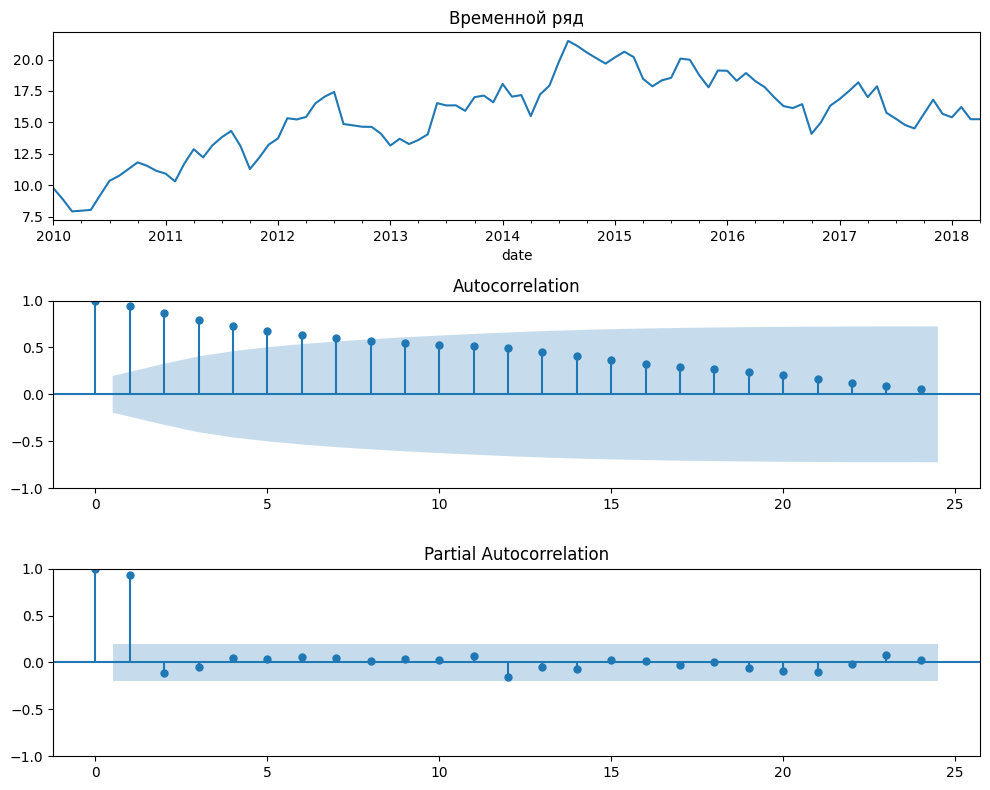

In [ ]:
ts_display(ts['rwalk'])

In [ ]:
# ADF тест с константой
result = adfuller(ts['rwalk'], regression='ct', autolag='AIC')
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.3f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.788
p-value: 0.710
Critical Values:
	1%: -4.053
	5%: -3.456
	10%: -3.154


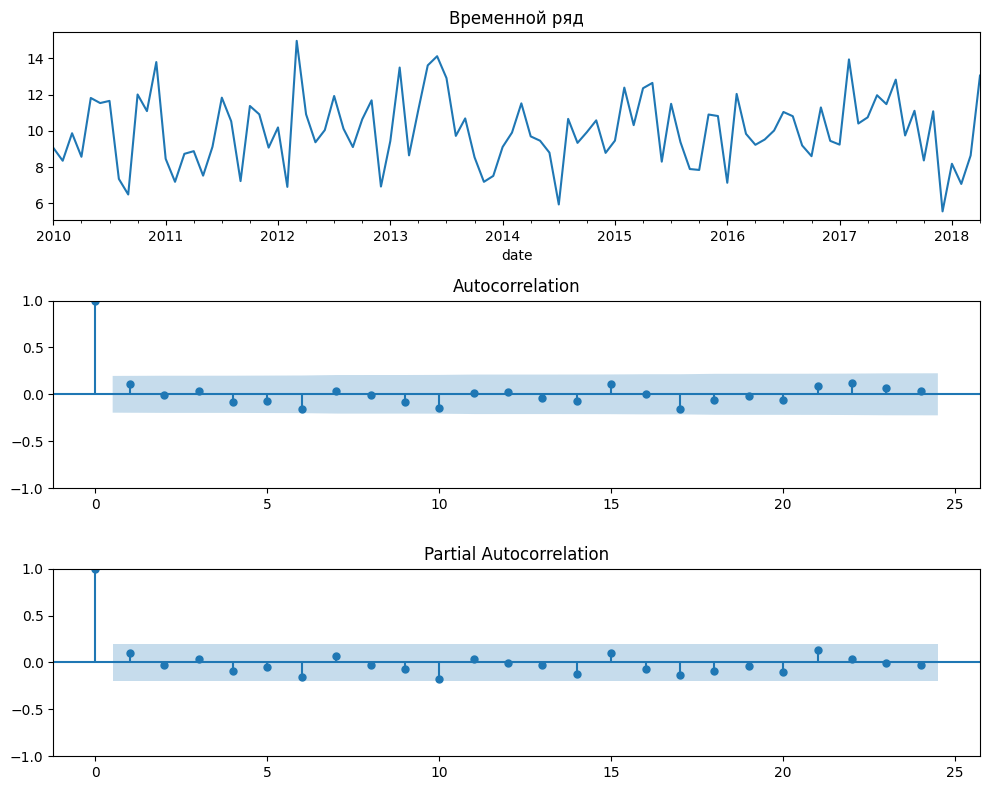

In [ ]:
ts_display(ts['wn'])

In [ ]:
# ADF тест с константой
result = adfuller(ts['wn'], regression='ct', autolag='AIC')
print('ADF Statistic: %.3f' % result[0])
print('p-value: %.3f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.694
p-value: 0.000
Critical Values:
	1%: -4.053
	5%: -3.456
	10%: -3.154


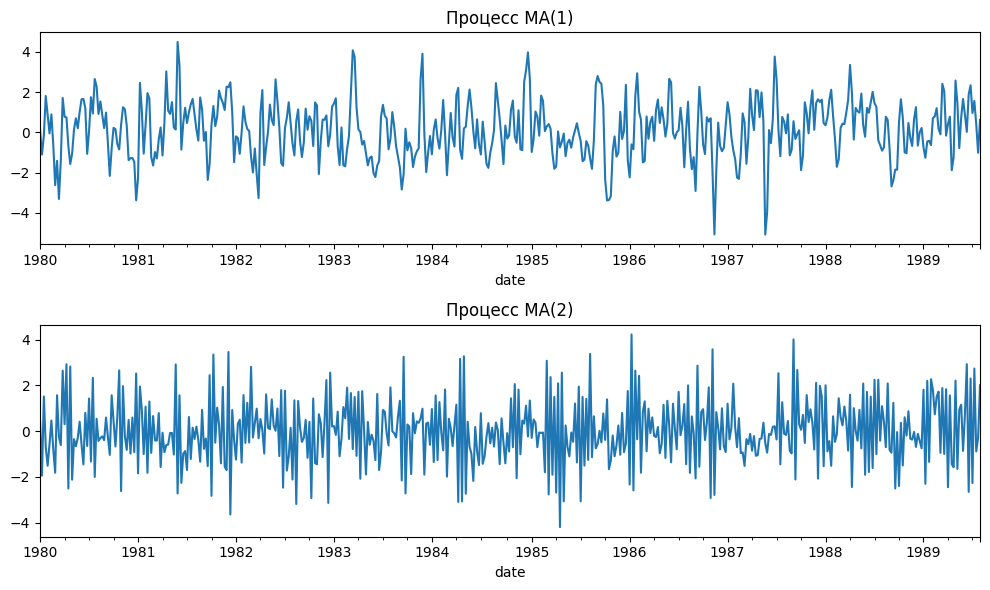

In [ ]:
# Задание 2. MA(q)-процессы
n_obs = 500

# MA(1): x_t = u_t + 0.9*u_(t-1)
ma1 = ArmaProcess(ar=[1], ma=[1, 0.9]).generate_sample(nsample=n_obs)

# MA(2): y_t = u_t - 0.6*u_(t-1) + 0.8*u_(t-2)
ma2 = ArmaProcess(ar=[1], ma=[1, -0.6, 0.8]).generate_sample(nsample=n_obs)

# Создаем DataFrame
data_ma = pd.DataFrame({
    'x': ma1,
    'y': ma2,
    'date': pd.date_range(start='1980-01-01', periods=n_obs, freq='W')
}).set_index('date')

# Визуализация
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
data_ma['x'].plot(ax=ax1, title='Процесс MA(1)')
data_ma['y'].plot(ax=ax2, title='Процесс MA(2)')
plt.tight_layout()
plt.show()

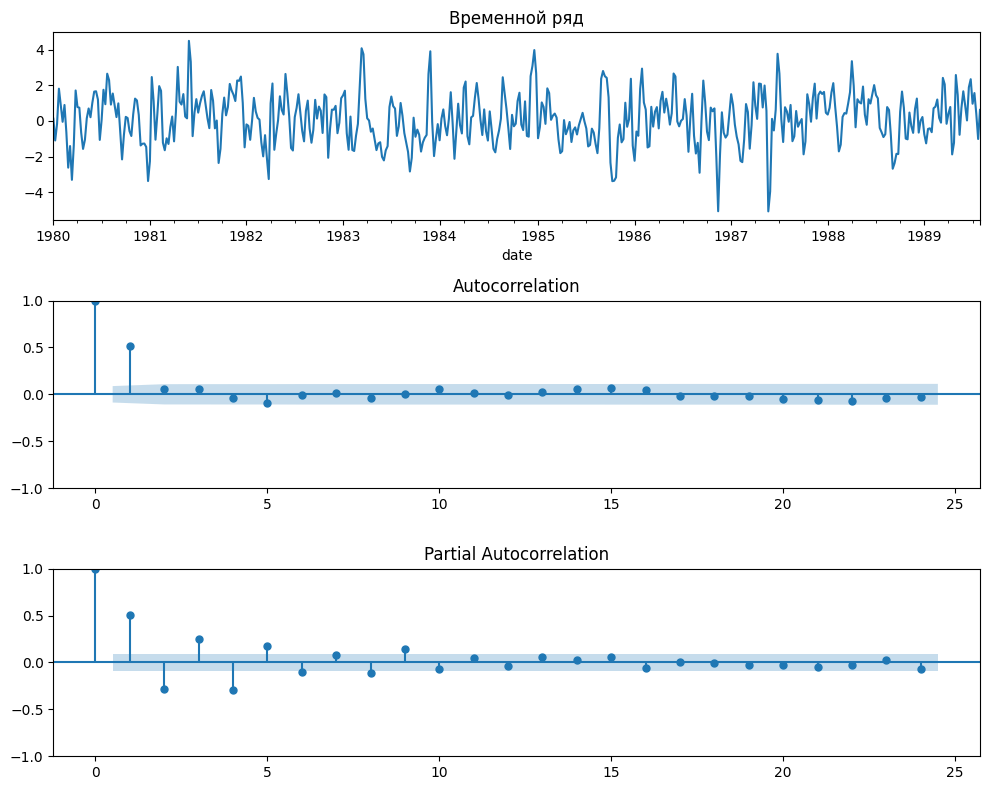

In [ ]:
# ACF и PACF для MA(1)
ts_display(data_ma['x'])

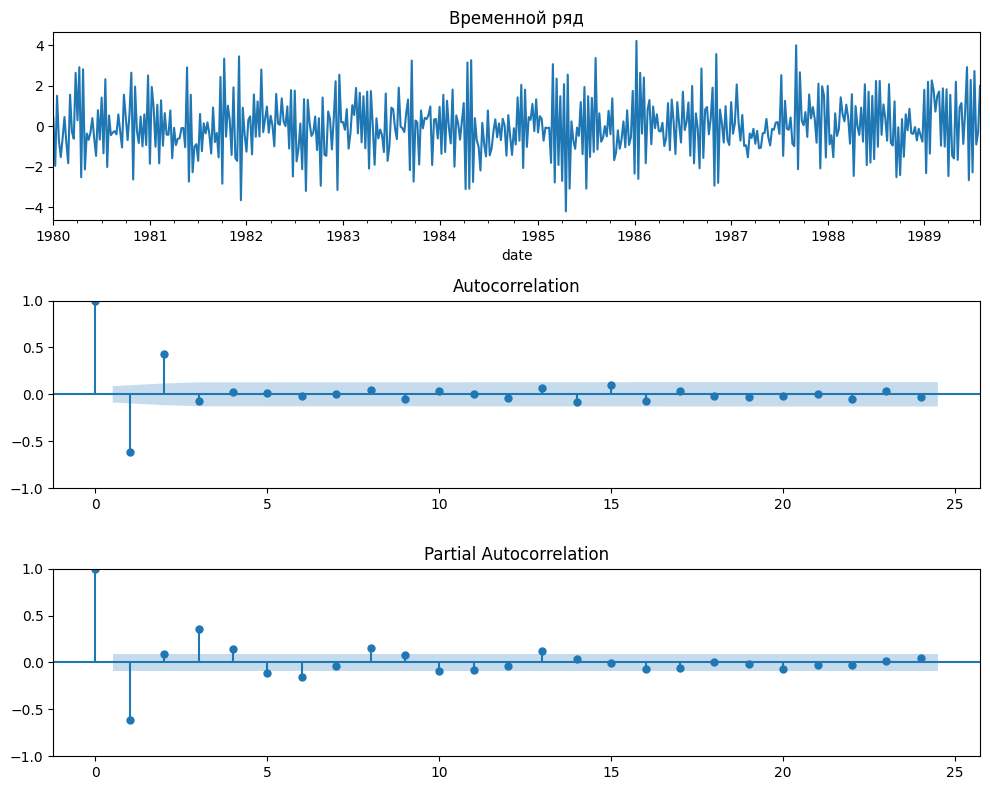

In [ ]:
# ACF и PACF для MA(2)
ts_display(data_ma['y'])

<ipython-input-39-6b700218dd3c>:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  date = pd.date_range(start="1996-01-01", periods=n_obs, freq='Q')


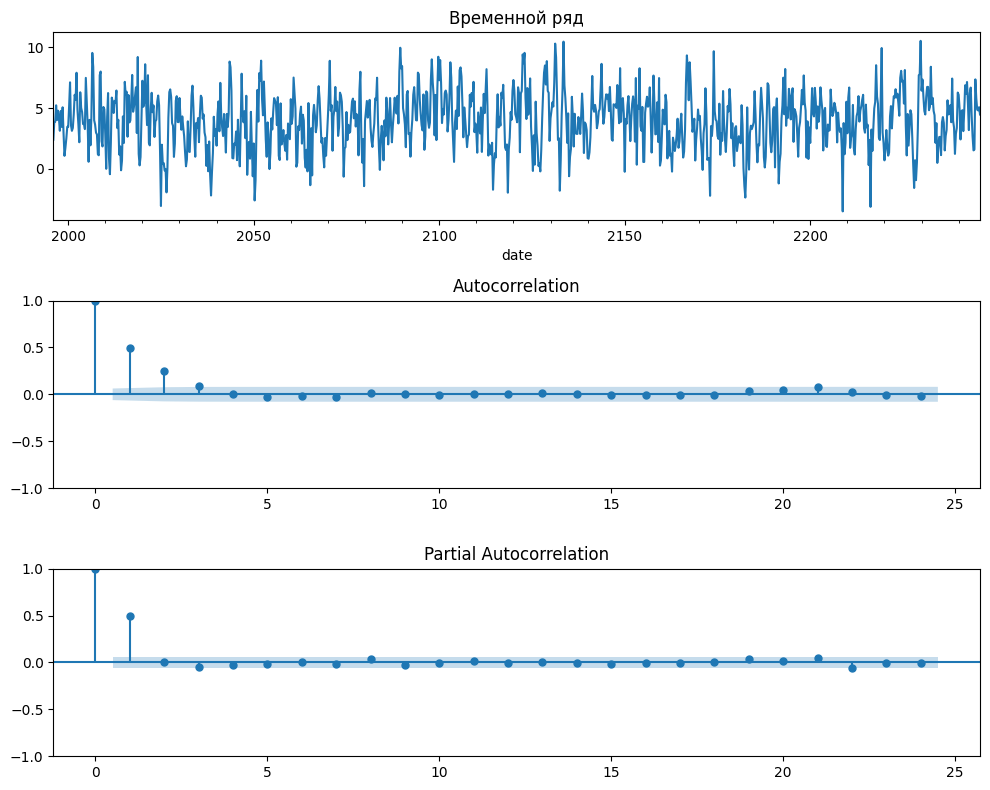

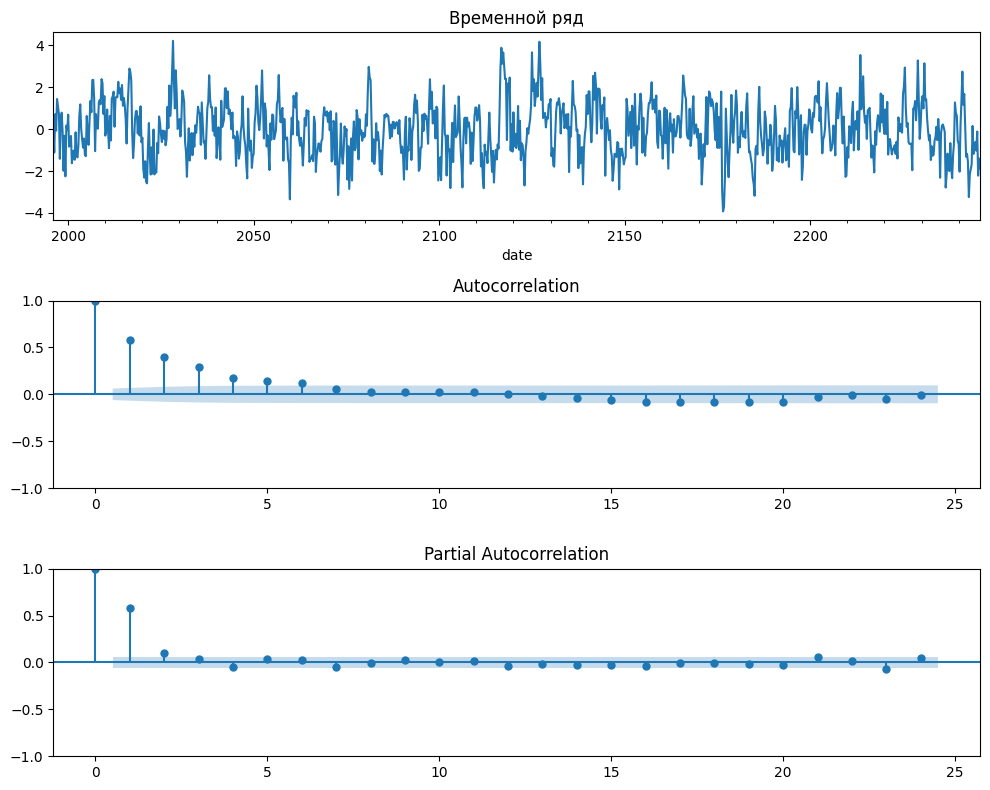

In [ ]:
# Задание 3. AR(p)-процессы
np.random.seed(1000)
n_obs = 1000

# Генерация AR процессов
# AR(1): x_t = 4 + 0.5*x_(t-1) + u_t, u_t ~ WN(0, 4)
ar1 = ArmaProcess(ar=[1, -0.5], ma=[1]).generate_sample(nsample=n_obs, scale=2) + 4

# AR(2): y_t = 0.5*y_(t-1) + 0.06*y_(t-2) + u_t, u_t ~ WN(0, 1)
ar2 = ArmaProcess(ar=[1, -0.5, -0.06], ma=[1]).generate_sample(nsample=n_obs)

# Создаем DataFrame с квартальными датами
date = pd.date_range(start="1996-01-01", periods=n_obs, freq='Q')
data_ar = pd.DataFrame({
    'x': ar1,
    'y': ar2,
    'date': date
}).set_index('date')

# Визуализация ACF и PACF
def ts_display(series, lags=24):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
    series.plot(ax=ax1)
    ax1.set_title('Временной ряд')
    plot_acf(series, lags=lags, ax=ax2)
    plot_pacf(series, lags=lags, ax=ax3, method='ywm')
    plt.tight_layout()
    plt.show()

ts_display(data_ar['x'])
ts_display(data_ar['y'])

<ipython-input-40-fdfdb4f45de7>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date = pd.date_range(start='2010-01-01', periods=n_obs, freq='M')


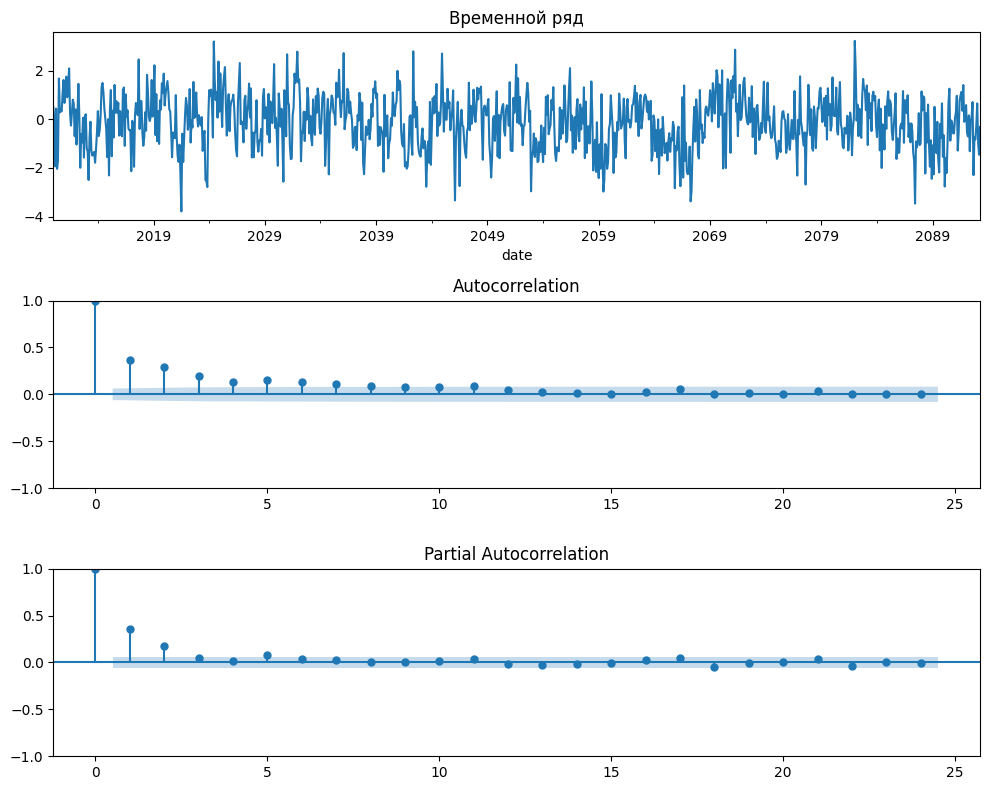

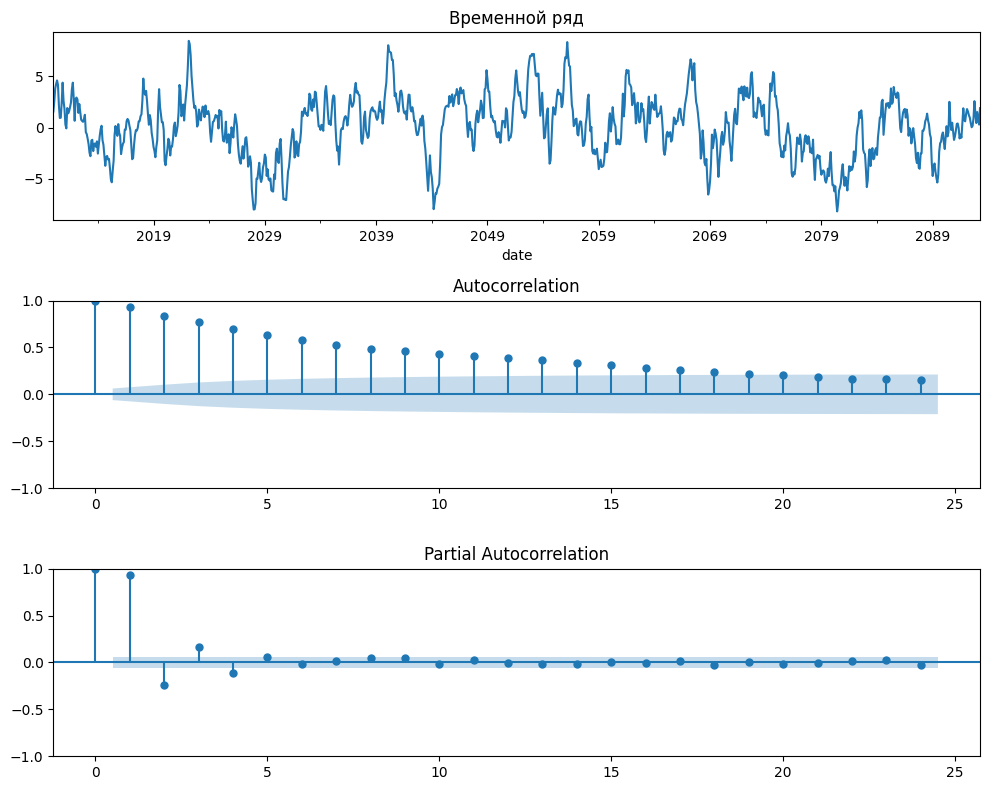

In [ ]:
# Задание 5. ARMA(p,q)-процессы
# x: ARMA(1,1): x_t = 0.7*x_(t-1) + u_t - 0.4*u_(t-1), u_t ~ WN(0, 1)
arma11 = ArmaProcess(ar=[1, -0.7], ma=[1, -0.4]).generate_sample(nsample=n_obs)

# y: ARMA(2,1): y_t = 0.6*y_(t-1) + 0.3*y_(t-2) + u_t + 0.7*u_(t-1), u_t ~ WN(0, 1)
arma21 = ArmaProcess(ar=[1, -0.6, -0.3], ma=[1, 0.7]).generate_sample(nsample=n_obs)

# Создаем DataFrame с месячными датами
date = pd.date_range(start='2010-01-01', periods=n_obs, freq='M')
data_arma = pd.DataFrame({
    'x': arma11,
    'y': arma21,
    'date': date
}).set_index('date')

# Визуализация ARMA процессов
ts_display(data_arma['x'])
ts_display(data_arma['y'])